# Example of usage Spark OCR original file formatting keeper

## Install spark-ocr python packge
Need specify license and path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
AWS_ACCESS_KEY_ID = ""
AWS_SECRET_ACCESS_KEY = ""

version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.12/"

In [2]:
# install from PYPI using secret
#%pip install spark-ocr==$version+spark30 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

In [3]:
import os
import sys

sys.path.append("/home/alexander_jsl/Workspace/spark-ocr/python/")

if license:
    os.environ['JSL_OCR_LICENSE'] = license

## Initialization of spark session

In [4]:
from pyspark import SparkConf
from sparkocr import start

if license:
    os.environ['SPARK_OCR_LICENSE'] = license

spark = start(jar_path = spark_ocr_jar_path, nlp_version="3.2.3")

spark

Spark version: 3.0.2
Spark NLP version: 3.3.2
Spark OCR version: 3.9.0



## Import OCR transformers

In [5]:
from sparkocr.transformers import *
from sparkocr.enums import *
from pyspark.ml import PipelineModel
from sparkocr.utils import *

## Show original file


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/data/keeplayout/cTDaR_t10041.jpg
    Resolution: 0 dpi
    Width: 1196 px
    Height: 1685 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


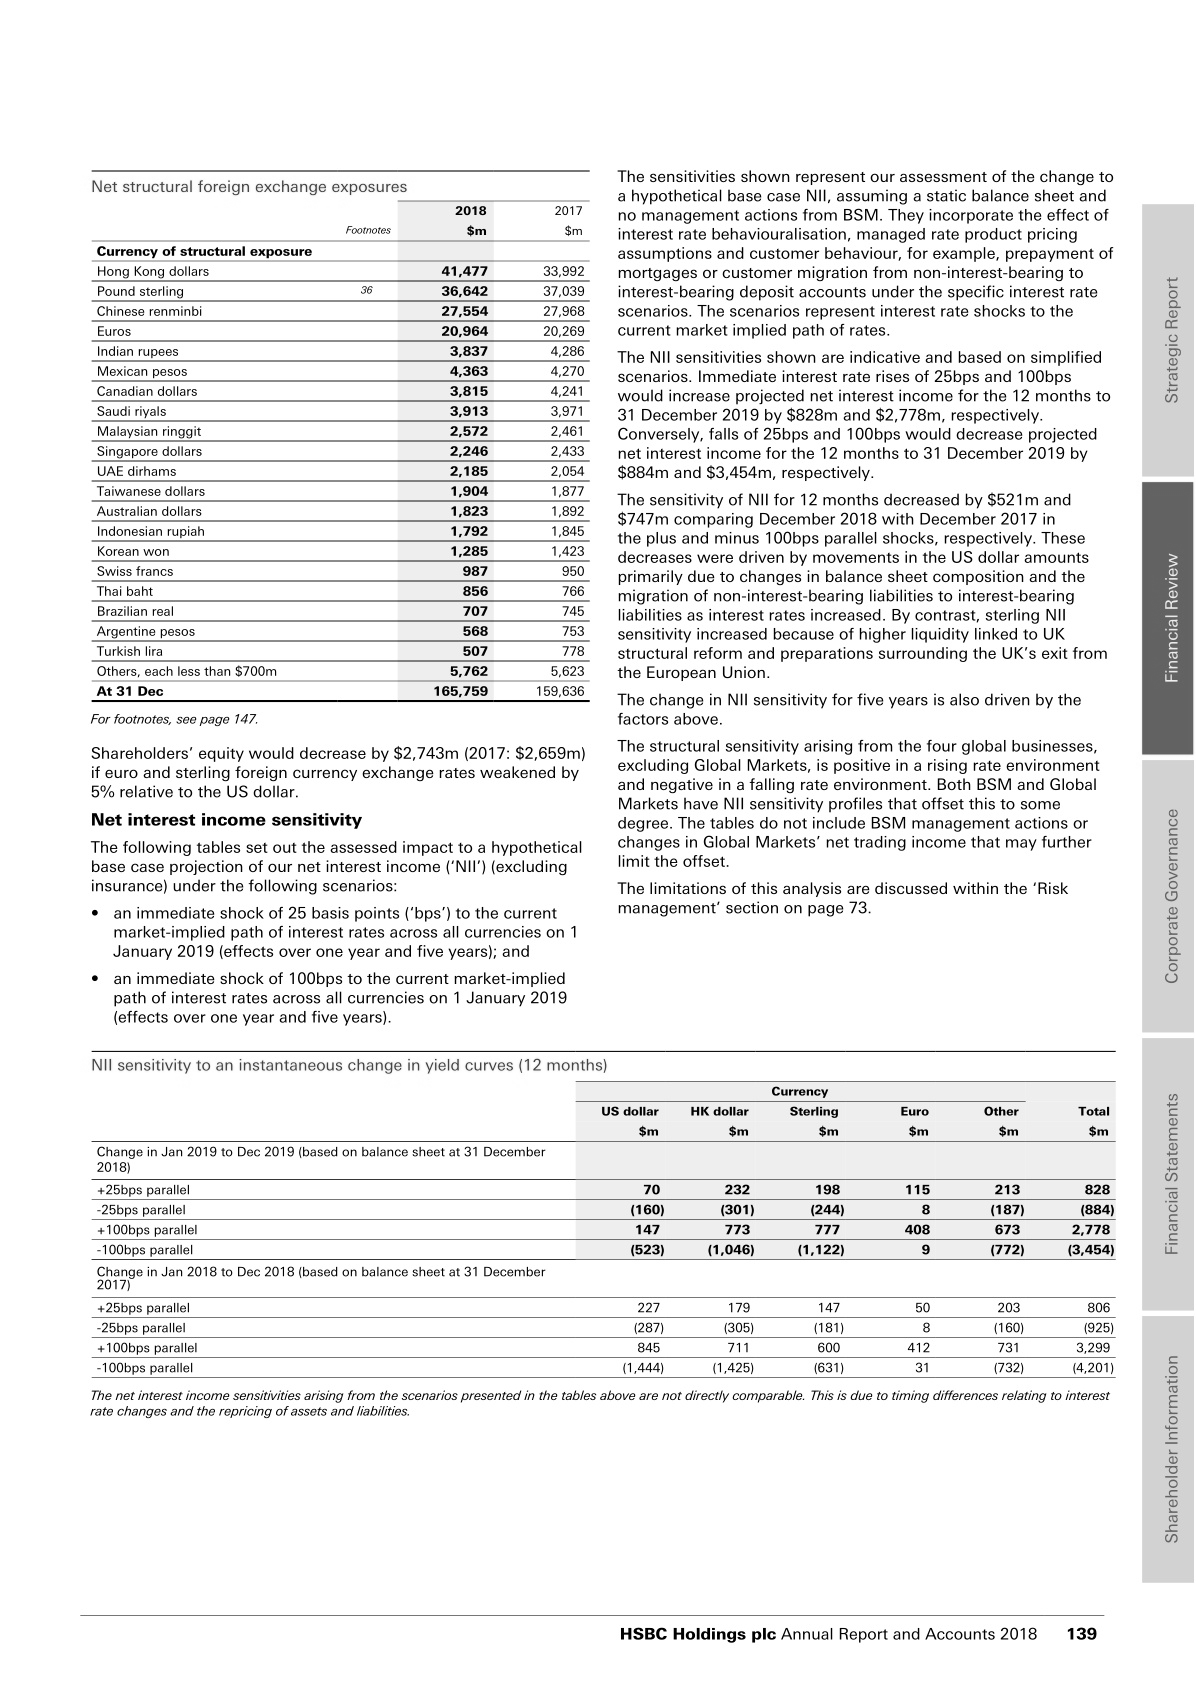

In [6]:
image_raw = spark.read.format("binaryFile").load("data/keeplayout/cTDaR_t10041.jpg").cache()
example_df = BinaryToImage().transform(image_raw)
display_images(example_df)

In [7]:
%%html   
<style type='text/css'>
.CodeMirror{
font-size: 15px;
}

div.output_area pre {
    font-size: 10px;

</style>

## Sample of missing formatting during OCR on image

In [8]:
def pipeline_nolayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)
    
    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text")
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result_bin = pipeline_nolayout().transform(example_df).cache()
print(result_bin.select("text").collect()[0].text)

Net structural foreign exchange exposures

Footnotes $m $m
Currency of structural exposure
Hong Kong dollars

 

Indian rupees
Mexican pesos

Canadian dollars

Saudi riyals

Malaysian ringgit

Singapore dollars

UAE dirhams.

Taiwanese dollars

Australian dollars

Indonesian rupiah

Korean won.

‘Swiss francs

Thai baht

Brazilian real

Argentine pesos

Turkish lira

Others, each less than $700m
At31 Dec

For footnotes, see page 147.
Shareholders’ equity would decrease by $2,743m (2017: $2,659m)

if euro and sterling foreign currency exchange rates weakened by
5% relative to the US dollar.

Ne' ity
The following tables set out the assessed impact to a hypothetical

base case projection of our net interest income (‘NII’) (excluding
insurance) under the following scenarios:

   

terest income sensi

* animmediate shock of 25 basis points (‘bps’) to the current
market-implied path of interest rates across all currencies on 1
January 2019 (effects over one year and five years); and

* an 

## Sample of keeping formatting during OCR on image

In [9]:
def pipeline_keeplayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)

    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text") \
        .setOcrParams(["preserve_interword_spaces=1", ]) \
        .setKeepLayout(True) \
        .setOutputSpaceCharacterWidth(8)
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result2 = pipeline_keeplayout().transform(example_df).cache()
print(result2.select("text").collect()[0].text)


                                                                             The sensitivities shown represent our assessment ofthe change to        
           Net structural foreign exchange exposures                         ano hypothetical base actions case NI, from BSM. assuming a staticbalanc
                                          Footnotes       $m          $m     interest rate management behaviouralisation, They managed rate incorpora
            HongCurrency Kong of dollars structural exposure                 mortgagesassumptions or and customer customer migration behaviour, from 
                                                                             scenarios. Theinterest-bearing deposit scenarios accounts under interest
                                                                             current market implied path ofrepresent rates.                      Repo
            IndianMexican rupees pesos                                       The NIIscenarios. sensi